                    ‘AI-modell’ som kan förutse om en kundsession kommer att resultera i ett köp eller inte

Företaget behöver förstå vilka kunder som faktiskt konverterar och köper. I denna uppgift ska vi hitta en ‘AI-modell’ som kan förutse om en kundsession kommer att resultera i ett köp eller inte, i realtid.
Både styrkor & svagheter i prediktioner behöver lyftas. För att Revenue är en binär variabel ska vi använda de verktyg som passar för detta mål. 

Våra steg:
1. Dataförståelse och förberedelse. Utforska och förstå det givna datasetet
2. EDA för att identifiera mönster och samband i data
3. Identifiera och behandla eventuella brister eller inkonsekvenser i data (t.ex. saknade värden, outliers, onormala värden)
4. Testa några ML modeller (logistic regression, Random Frorest och KNN) och välja mest passande. 
5. Utveckla valda modellen och svara på frågan om vilka kunder konverterar och köper. 

In [52]:
# Laddda ner alla paket som vi ska behöva i denna uppgift 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve

In [53]:
# Läs in data från CSV-filen
df = pd.read_csv("./project_data.csv", delimiter=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               12330 non-null  int64  
 1   Administrative           12330 non-null  int64  
 2   Administrative_Duration  12330 non-null  float64
 3   Informational            12330 non-null  int64  
 4   Informational_Duration   12330 non-null  float64
 5   ProductRelated           12330 non-null  int64  
 6   ProductRelated_Duration  12330 non-null  float64
 7   BounceRates              12330 non-null  float64
 8   ExitRates                12330 non-null  float64
 9   PageValues               12330 non-null  float64
 10  SpecialDay               12207 non-null  float64
 11  Month                    12330 non-null  object 
 12  OperatingSystems         12330 non-null  int64  
 13  Browser                  12146 non-null  float64
 14  Region                

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False


In [54]:
df.describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12207.00000,12330.000000,12146.000000,12084.000000,12330.000000
mean,6164.500000,2.238200,1269.776004,0.503569,34.472398,31.731468,1194.746220,0.044239,0.043073,5.889258,0.06126,2.124006,2.360283,3.145647,4.069586
std,3559.508744,3.409269,34071.466930,1.270156,140.749294,44.475503,1913.669288,0.239735,0.048597,18.568437,0.19865,0.911325,1.722001,2.402440,4.025169
min,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.498680,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
25%,3082.250000,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.00000,2.000000,2.000000,1.000000,2.000000
50%,6164.500000,1.000000,8.000000,0.000000,0.000000,18.000000,598.936905,0.002896,0.025156,0.000000,0.00000,2.000000,2.000000,3.000000,2.000000
75%,9246.750000,4.000000,93.787500,0.000000,0.000000,38.000000,1464.157214,0.018029,0.050000,0.000000,0.00000,3.000000,2.000000,4.000000,4.000000
max,12329.000000,27.000000,989493.000000,24.000000,2549.375000,705.000000,63973.522230,2.098952,0.200000,361.763742,1.00000,8.000000,13.000000,9.000000,20.000000


Datasettet består av funktionsvektorer som tillhör 12 330 sessioner. Det har skapats så att varje session tillhör en unik användare under en 1-årsperiod för att undvika eventuella tendenser kopplade till en specifik kampanj, särskild dag, användarprofil eller tidsperiod.17 variabler, varav en är Revenue. De flesta är numeriska, men några är kategoriska. Vi kommer att utforska dem vidare.


In [55]:
df.isnull().sum()
df.isnull().sum(axis=1).sum()

700

In [56]:
700*100/12330

5.6772100567721

Missade värde omfatar 700 rader, det är 5.6 % av vårt data set, vilket inte är en kritisk nivå för att radera (10 % av NaN skulle bli en gräns).

In [57]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11643 entries, 3 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11643 non-null  int64  
 1   Administrative           11643 non-null  int64  
 2   Administrative_Duration  11643 non-null  float64
 3   Informational            11643 non-null  int64  
 4   Informational_Duration   11643 non-null  float64
 5   ProductRelated           11643 non-null  int64  
 6   ProductRelated_Duration  11643 non-null  float64
 7   BounceRates              11643 non-null  float64
 8   ExitRates                11643 non-null  float64
 9   PageValues               11643 non-null  float64
 10  SpecialDay               11643 non-null  float64
 11  Month                    11643 non-null  object 
 12  OperatingSystems         11643 non-null  int64  
 13  Browser                  11643 non-null  float64
 14  Region                   11

In [58]:
# Kontrollera att data set inte har missade värde längre 

df.isnull().sum(axis=1).sum()

0

Vi börjar att utforska vårt data set från kategoriska variabler. De är fyra. 

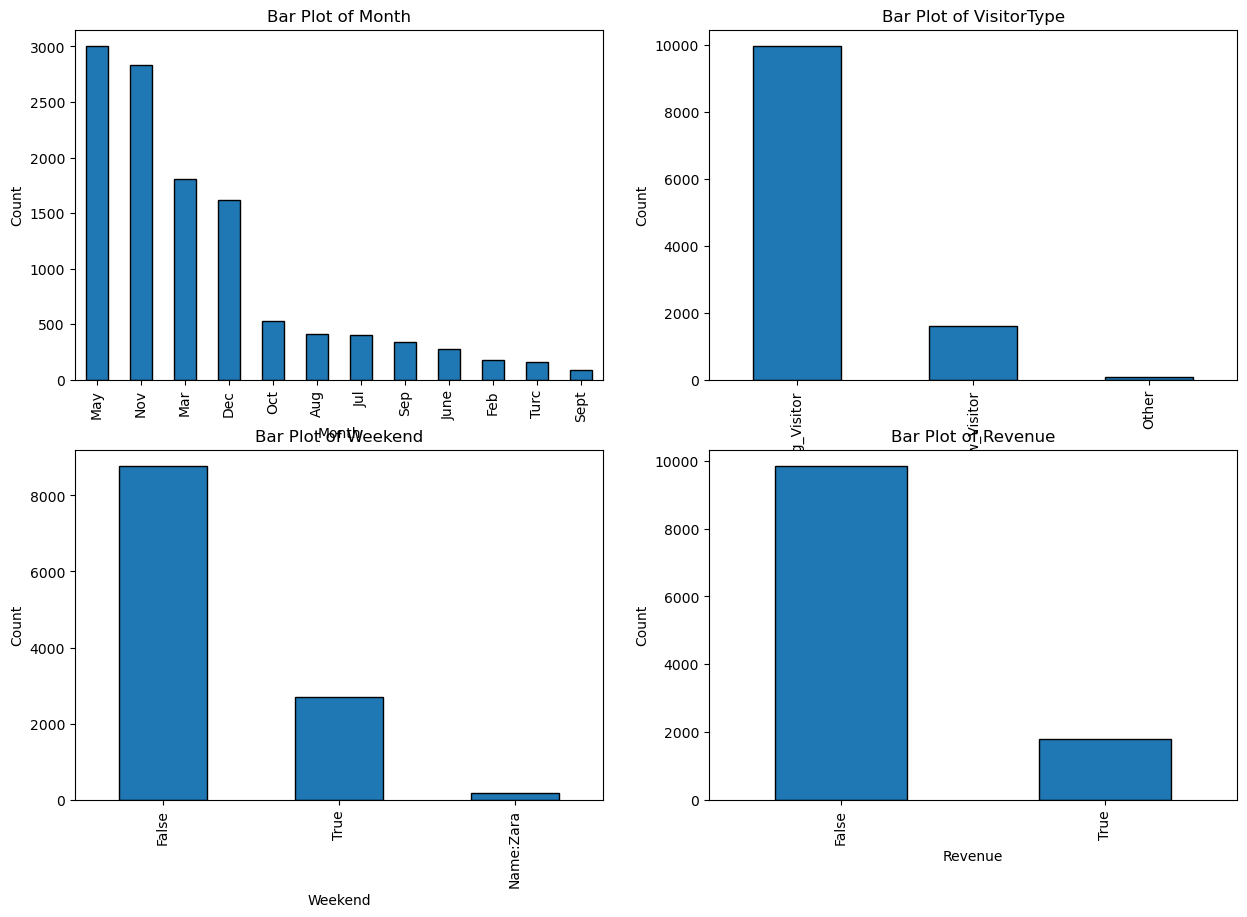

In [59]:
variables = df.columns[[11, 16, 17, 18]]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 subplot grid
    value_counts = df[var].value_counts(dropna=False)
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')


"Month" består av olika månader, men vi hittar fel på namn. Sep och Sept ska vi slå ihop i en kolumn medan Turc kan vi inte veta vad det betyder och därför måste vi göra radera den kolumnen helt, vi kan inte gissa hitta på att den kolumnen betyder missade April och Januari. 

VisitorType har tre värde, medan borde ha två : en ny kund eller inte, men för att "Other" har lite värde kan vi radera det för att skapa en binär variabel. 

Weekend som betyder dag av köp borde vara en bibär variabler. Tredje värde "Name:Zara" verkar vara felaktigt raderar vi dessa värde och variabel blir binär. 

Revenue har endast två värde från början True och False, men vidare ska vi omvandla de alla i numeriska variabler för att kunna manipulera med data, då alla binära variabler ska få värde 0 och 1. 

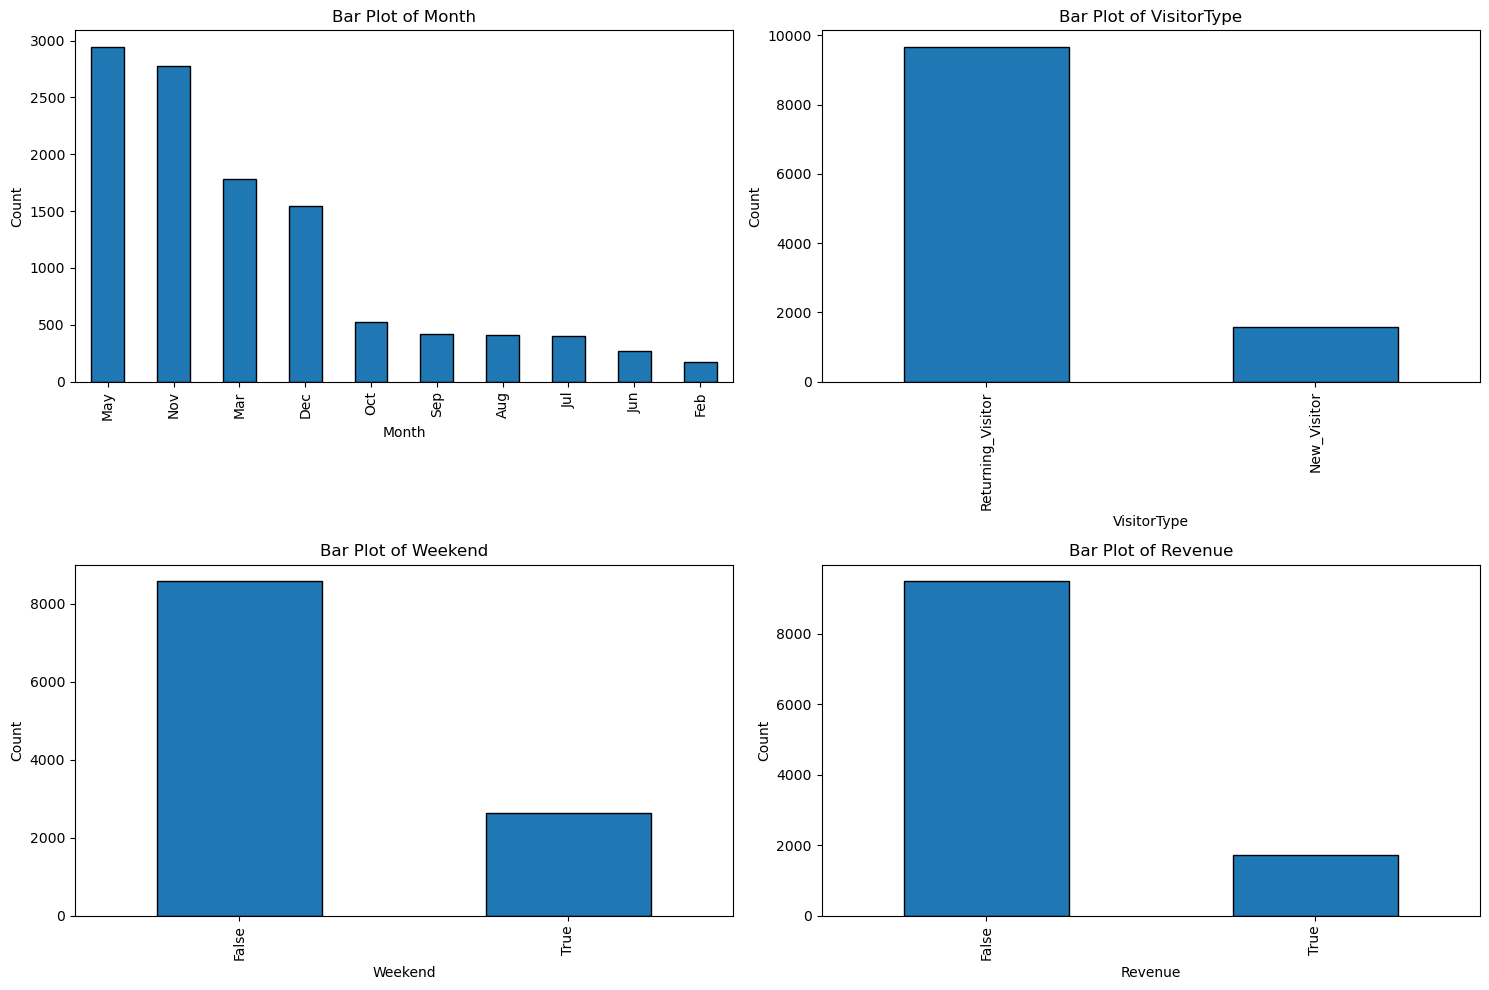

In [60]:
# Update the 'Month' column
df['Month'] = df['Month'].replace({'Sept': 'Sep', 'June': 'Jun','Turc': np.nan})

# Update the 'VisitorType' column
df['VisitorType'] = df['VisitorType'].replace('Other', np.nan)

# Update the 'Weekend' column
df['Weekend'] = df['Weekend'].replace('Name:Zara', np.nan)

# Update the 'Revenue' column
df['Revenue'] = df['Revenue'].replace('nan', np.nan)

# Drop rows with NaN values in the specified categorical variables
df.dropna(subset=['Month', 'VisitorType', 'Weekend', 'Revenue'], inplace=True)


# Selecting the columns for histogram
variables = df.columns[[11, 16, 17, 18]]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 subplot grid
    value_counts = df[var].value_counts(dropna=False)
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Vidare utför vi EDA för numeriska variabler för att förstå mönster av deras fördelning och se outlier. 

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

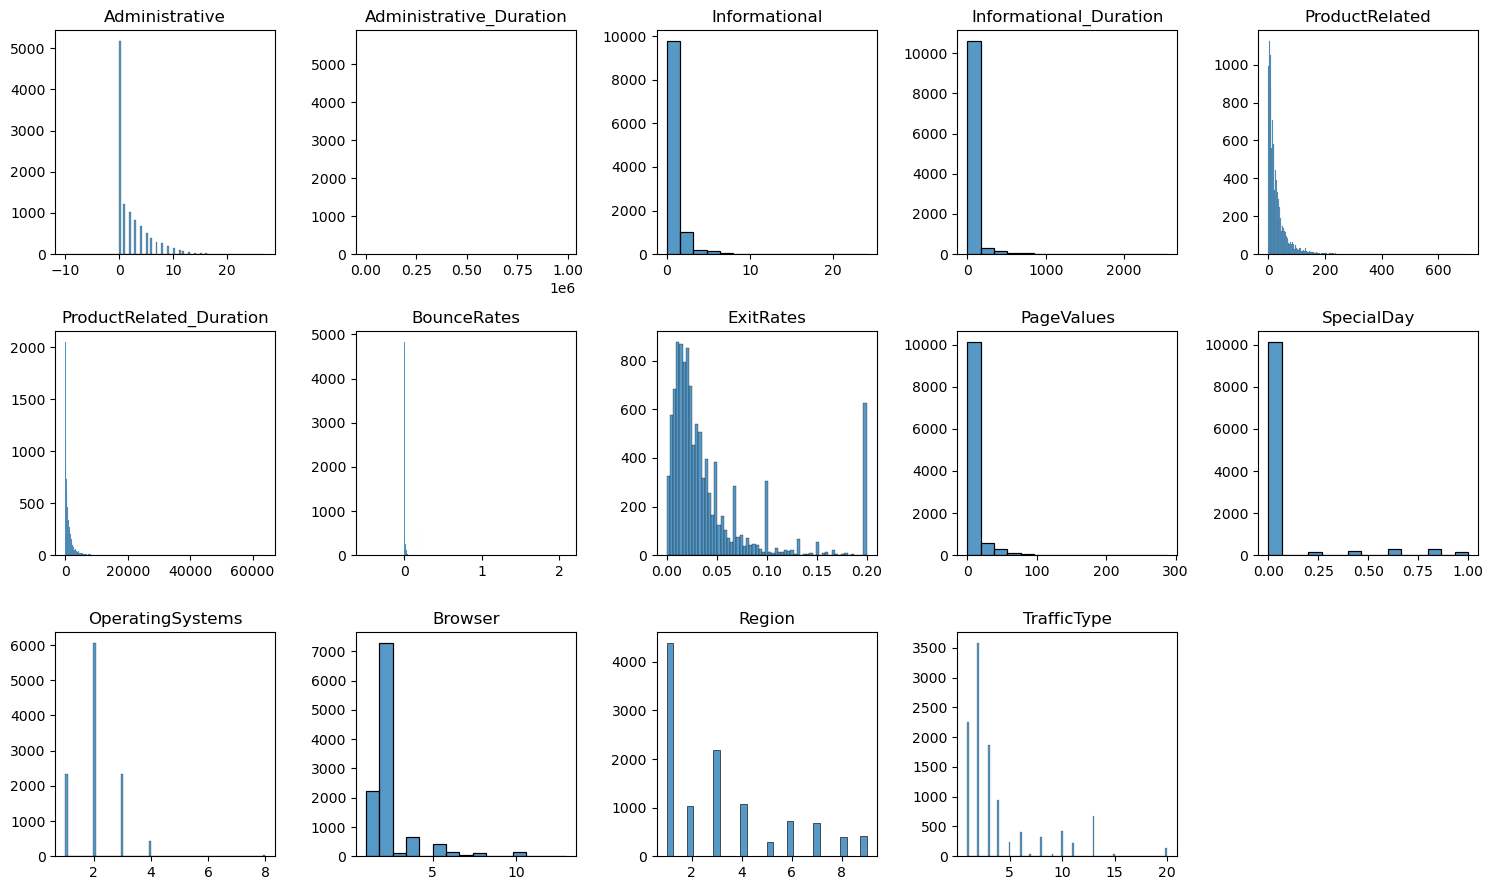

In [61]:
# EDA

# Lista med 18 variabler att använda för histogram
variables = df.columns[1:11].tolist() + df.columns[12:16].tolist()

# Skapa histogram
num_plots = len(variables)
num_rows = num_plots // 5 + (num_plots % 5 > 0)
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

for i, var in enumerate(variables):
    row = i // 5
    col = i % 5
    sns.histplot(df[var], ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Dölj överflödiga axlar
for i in range(num_plots, num_rows * 5):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Vi ser att skalorna varierar för alla variabler, vilket vi måste åtgärda för att kunna använda jämförbara värden av alla variabler i framtida modeller. Vi ska prova olika transformationer. Den första blir en transformation genom att dividera med max- eller minvärdet för att undvika outliers. Den andra är standardisering genom att dividera med standardavvikelsen för variablerna. Den tredje blir en logaritmisk transformation.

1. Transformation genom att dividera med max- eller minvärdet

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

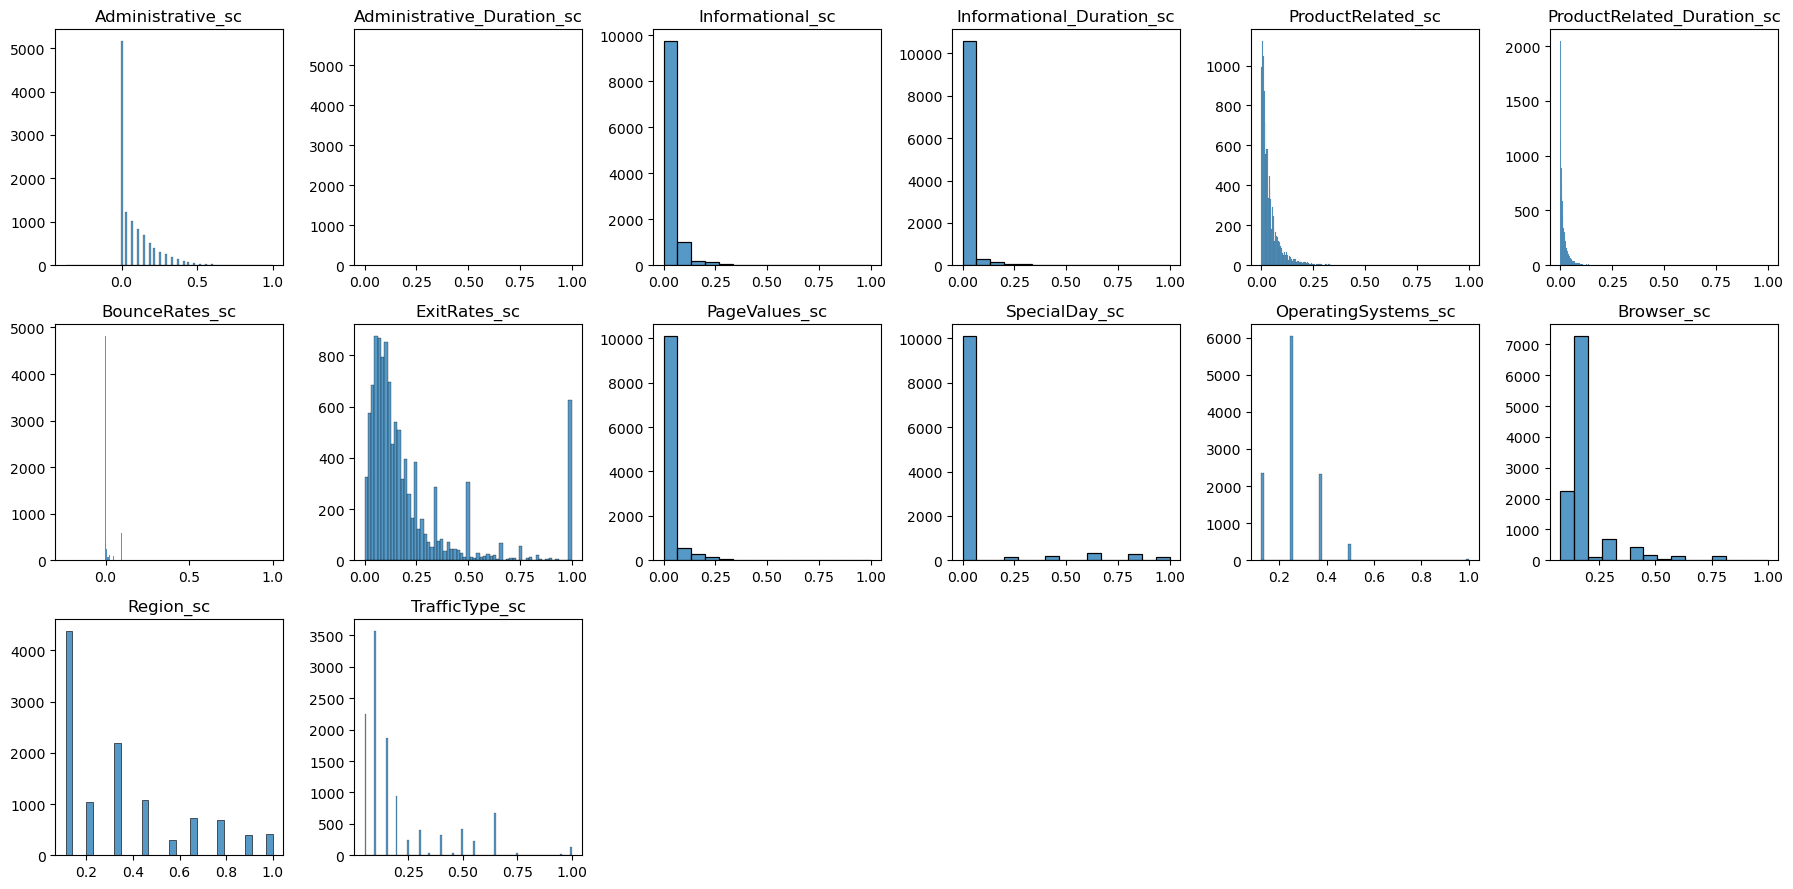

In [62]:

df = pd.DataFrame(df)
df_scale = pd.DataFrame()

# Function to scale by dividing by the max absolute value
def scale_by_max_abs(column):
    absolute_highest_value = max(np.abs(column.min()), np.abs(column.max()))
    return column / absolute_highest_value

# Apply the scaling function to the specified columns
columns_to_scale = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]

for col in columns_to_scale:
    df_scale[col + '_sc'] = scale_by_max_abs(df[col])

variables = df_scale.columns.tolist()

# Plotting the histograms for selected variables
num_plots = len(variables)
num_rows = num_plots // 6 + (num_plots % 6 > 0)
fig, axes = plt.subplots(num_rows, 6, figsize=(18, 3 * num_rows))

for i, var in enumerate(variables):
    row = i // 6
    col = i % 6
    sns.histplot(df_scale[var], ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Hide any extra subplots
for i in range(num_plots, num_rows * 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


2. Transformation via StandardScaler. Standardisering genom att dividera med standardavvikelsen för variablerna

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

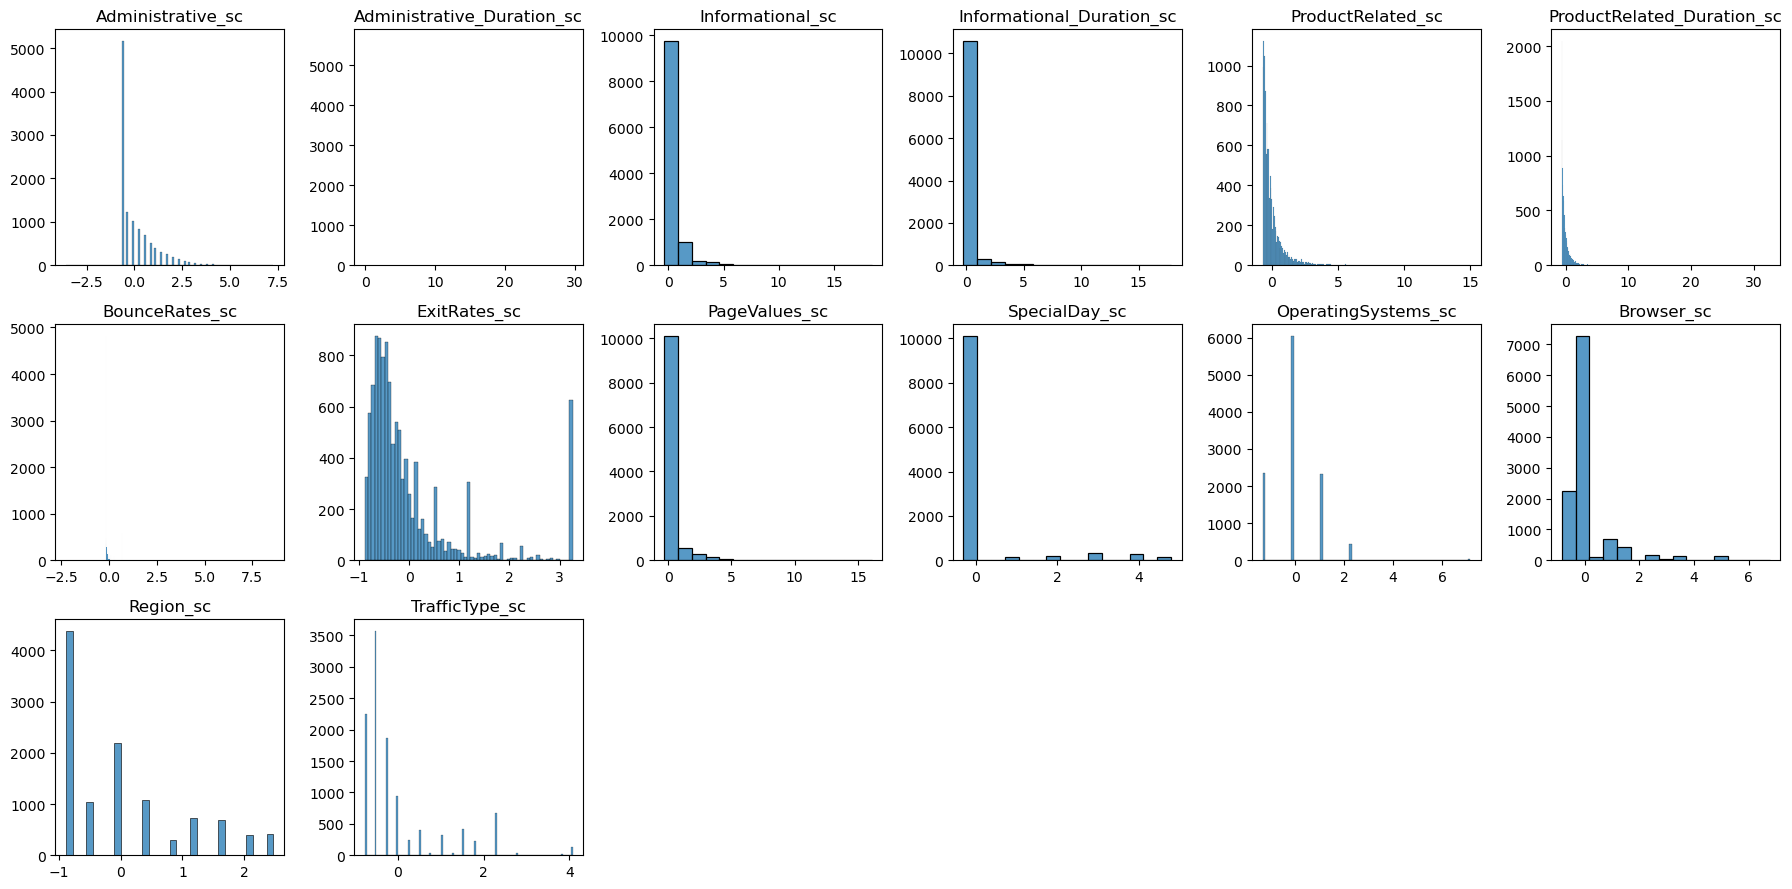

In [63]:

df = pd.DataFrame(df)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaling function to the specified columns
columns_to_scale2 = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]

# Create a new DataFrame for the scaled values with the same index as df
df_scale2 = pd.DataFrame(index=df.index)

for col in columns_to_scale2:
    df_scale2[col + '_sc'] = scaler.fit_transform(df[[col]])

variables = df_scale2.columns.tolist()

# Plotting the histograms for selected variables
num_plots = len(variables)
num_rows = num_plots // 6 + (num_plots % 6 > 0)
fig, axes = plt.subplots(num_rows, 6, figsize=(18, 3 * num_rows))

for i, var in enumerate(variables):
    row = i // 6
    col = i % 6
    sns.histplot(df_scale2[var], ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Hide any extra subplots
for i in range(num_plots, num_rows * 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



3. Logaritmisk transformation

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Natalia\anac

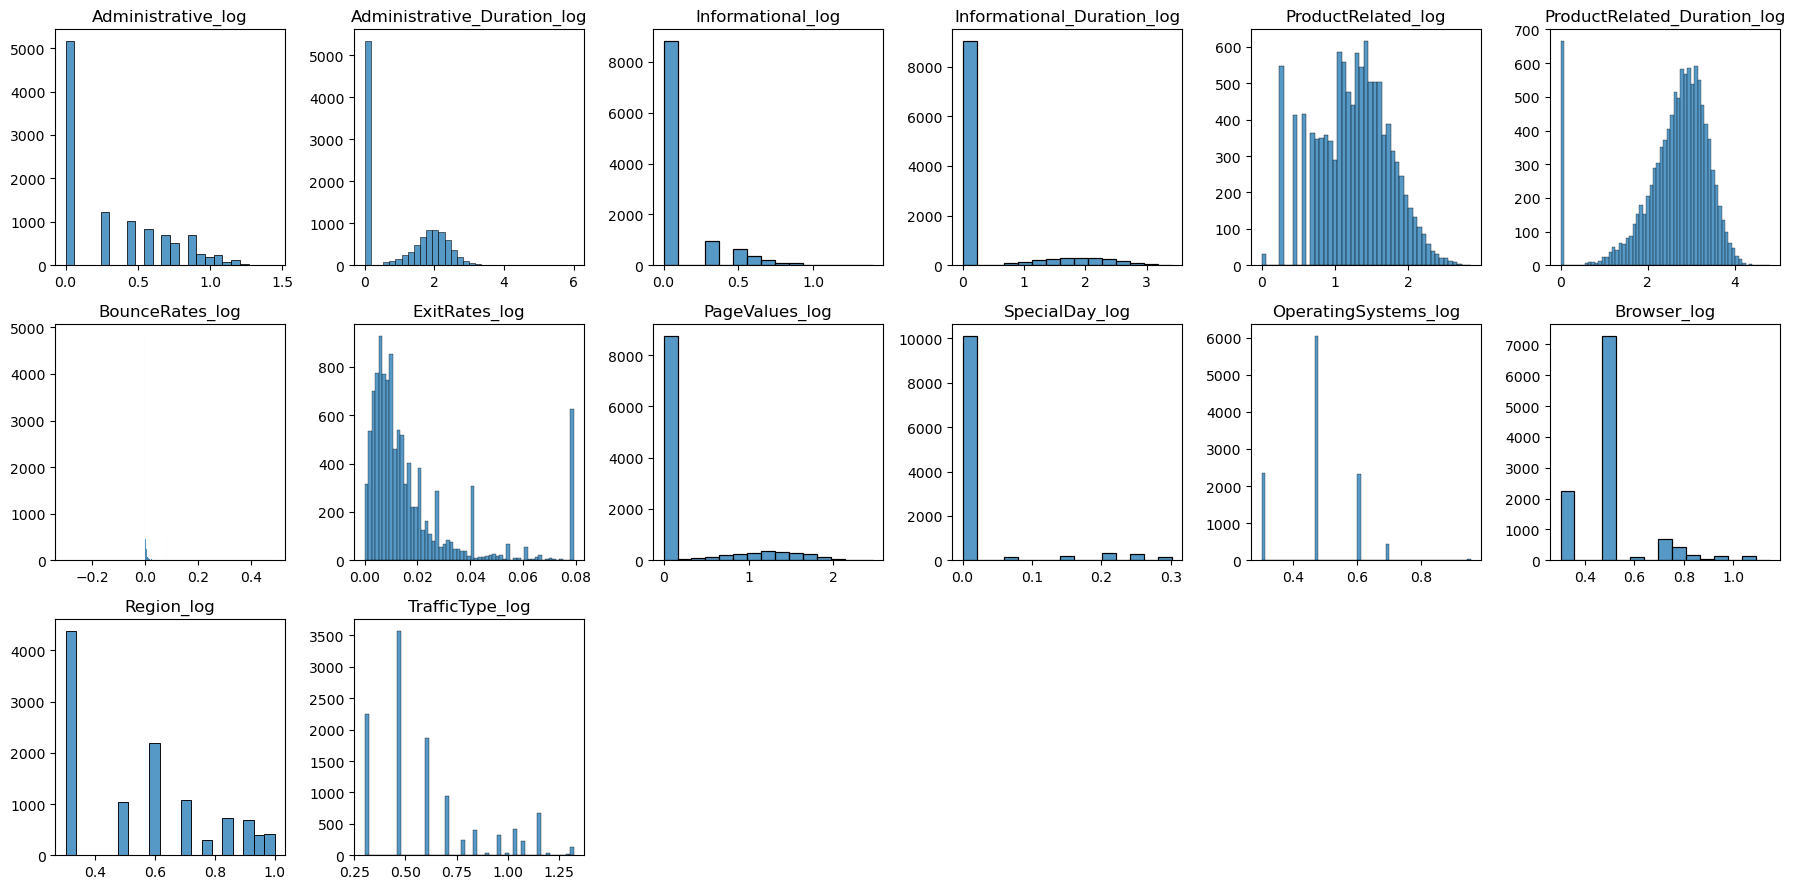

In [64]:
# Apply log base 10 transformation to the specified columns
columns_to_transform = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]

# Add log-transformed columns to df
for col in columns_to_transform:
    df[col + '_log'] = np.log10(df[col] + 1)  # Adding 1 to avoid log(0)

# Plotting the histograms for the transformed variables
log_columns = [col + '_log' for col in columns_to_transform]
num_plots = len(log_columns)
num_rows = num_plots // 6 + (num_plots % 6 > 0)
fig, axes = plt.subplots(num_rows, 6, figsize=(18, 3 * num_rows))

for i, var in enumerate(log_columns):
    row = i // 6
    col = i % 6
    sns.histplot(df[var], ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Hide any extra subplots
for i in range(num_plots, num_rows * 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



Utifrån de tre transformationerna kan vi se att den logaritmiska transformationen ger den mest jämna fördelningen av alla variabler, även om de flesta har outliers vid värdet 0. Vi kommer därför att använda den skalan, och alla våra modeller ska ha logaritmiskt transformerade värden av variablerna för att förutse Revenue.

Vidare ska vi omvandla de kategoriska variablerna till numeriska genom kodning. Först ska vi kontrollera de unika värdena.

In [65]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'Jun', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [66]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [67]:
df['Weekend'].unique()

array(['False', 'True'], dtype=object)

In [68]:
df['Revenue'].unique()

array([False, True], dtype=object)

In [69]:

# Encoding 'VisitorType', 'Weekend', 'Month' and 'Revenue'

# Step 1: One-Hot Encoding for 'Month'
month_dummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=False)  # Keep all month dummies
df = pd.concat([df, month_dummies], axis=1)

# Step 2: Convert boolean columns for months to integer
month_columns = month_dummies.columns
df[month_columns] = df[month_columns].astype(int)

# Drop rows with NaN values in the specified categorical variables
df.dropna(subset=['Month', 'VisitorType', 'Weekend', 'Revenue'], inplace=True)

# Map 'Weekend' to binary values (False=0, True=1) after ensuring they are in boolean format
df['Weekend'] = df['Weekend'].replace({'False': 0, 'True': 1}).astype(int)

# Encode 'VisitorType' as binary values (Returning_Visitor=0, New_Visitor=1)
df['VisitorType'] = df['VisitorType'].map({
    'Returning_Visitor': 0,
    'New_Visitor': 1
}).astype(int)

# Map 'Revenue' as binary values (False=0, True=1)
df['Revenue'] = df['Revenue'].replace({False: 0, True: 1}).astype(int)

df = df.drop('Month', axis=1)
df = df.drop('Unnamed: 0', axis=1)

# Display the modified DataFrame
print(df.head(5))


   Administrative  Administrative_Duration  Informational  \
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  Month_Dec  \
3     0.050000   0.140000         0.0         0.0  ...          0          0   
4     0.020000   0.050000         0.0         0.0  .

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11226 entries, 3 to 12329
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Administrative               11226 non-null  int64  
 1   Administrative_Duration      11226 non-null  float64
 2   Informational                11226 non-null  int64  
 3   Informational_Duration       11226 non-null  float64
 4   ProductRelated               11226 non-null  int64  
 5   ProductRelated_Duration      11226 non-null  float64
 6   BounceRates                  11226 non-null  float64
 7   ExitRates                    11226 non-null  float64
 8   PageValues                   11226 non-null  float64
 9   SpecialDay                   11226 non-null  float64
 10  OperatingSystems             11226 non-null  int64  
 11  Browser                      11226 non-null  float64
 12  Region                       11226 non-null  float64
 13  TrafficType          

In [71]:
df.isnull().sum()
df.isnull().sum(axis=1).sum()

99

Eftersom df_log skapades genom att tillämpa logaritmiska transformationer är det möjligt att några av de ursprungliga värdena i df var noll eller negativa, vilket skulle resultera i NaN-värden när logaritmen togs. Specifikt är logaritmen av noll odefinierad (vilket resulterar i -inf), och logaritmen av negativa tal är inte definierad inom det reella talsystemet.

In [72]:
df = df.dropna()
df.isnull().sum()
df.isnull().sum(axis=1).sum()

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 3 to 12329
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Administrative               11127 non-null  int64  
 1   Administrative_Duration      11127 non-null  float64
 2   Informational                11127 non-null  int64  
 3   Informational_Duration       11127 non-null  float64
 4   ProductRelated               11127 non-null  int64  
 5   ProductRelated_Duration      11127 non-null  float64
 6   BounceRates                  11127 non-null  float64
 7   ExitRates                    11127 non-null  float64
 8   PageValues                   11127 non-null  float64
 9   SpecialDay                   11127 non-null  float64
 10  OperatingSystems             11127 non-null  int64  
 11  Browser                      11127 non-null  float64
 12  Region                       11127 non-null  float64
 13  TrafficType          

In [74]:
11127*100/12330

90.2433090024331

Efter alla transformationer och manipulering av data har vi slutliga data set som har 90 % av urspungliga data set vilket betraktas som godtagbar. Vi skapar ett nytt data set med ett namn "data" för att omfatta endast omkodade och transformerade variablerna i sig. 

In [75]:

# List of additional columns
additional_columns = ['VisitorType', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
                      'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Revenue']

# Combine all the necessary columns into the data DataFrame
data = pd.concat([df[log_columns], df[additional_columns]], axis=1)

# Display the combined DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 3 to 12329
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Administrative_log           11127 non-null  float64
 1   Administrative_Duration_log  11127 non-null  float64
 2   Informational_log            11127 non-null  float64
 3   Informational_Duration_log   11127 non-null  float64
 4   ProductRelated_log           11127 non-null  float64
 5   ProductRelated_Duration_log  11127 non-null  float64
 6   BounceRates_log              11127 non-null  float64
 7   ExitRates_log                11127 non-null  float64
 8   PageValues_log               11127 non-null  float64
 9   SpecialDay_log               11127 non-null  float64
 10  OperatingSystems_log         11127 non-null  float64
 11  Browser_log                  11127 non-null  float64
 12  Region_log                   11127 non-null  float64
 13  TrafficType_log      

Kontrollerar en gång till missade värde. 

In [76]:
# Check for NaNs
print("NaN values:n/", np.isnan(data).sum())

NaN values:n/ Administrative_log             0
Administrative_Duration_log    0
Informational_log              0
Informational_Duration_log     0
ProductRelated_log             0
ProductRelated_Duration_log    0
BounceRates_log                0
ExitRates_log                  0
PageValues_log                 0
SpecialDay_log                 0
OperatingSystems_log           0
Browser_log                    0
Region_log                     0
TrafficType_log                0
VisitorType                    0
Weekend                        0
Month_Aug                      0
Month_Dec                      0
Month_Feb                      0
Month_Jul                      0
Month_Jun                      0
Month_Mar                      0
Month_May                      0
Month_Nov                      0
Month_Oct                      0
Month_Sep                      0
Revenue                        0
dtype: int64


In [77]:
# Check for infinite values
print("Infinite values:", np.isinf(data).sum())

Infinite values: Administrative_log             13
Administrative_Duration_log     0
Informational_log               0
Informational_Duration_log      0
ProductRelated_log              0
ProductRelated_Duration_log     0
BounceRates_log                 0
ExitRates_log                   0
PageValues_log                  0
SpecialDay_log                  0
OperatingSystems_log            0
Browser_log                     0
Region_log                      0
TrafficType_log                 0
VisitorType                     0
Weekend                         0
Month_Aug                       0
Month_Dec                       0
Month_Feb                       0
Month_Jul                       0
Month_Jun                       0
Month_Mar                       0
Month_May                       0
Month_Nov                       0
Month_Oct                       0
Month_Sep                       0
Revenue                         0
dtype: int64


Vi ser att vi har fått oändliga värde, men för att det är endast 13 rader kan vi radera bort dem. 

In [78]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data.isnull().sum()
data.isnull().sum(axis=1).sum()


0

Nu när alla våra variabler är numeriska kan vi bygga upp en korrelationsmtris där vi ska se vilka variabler påverkar Revenue resultat. 

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


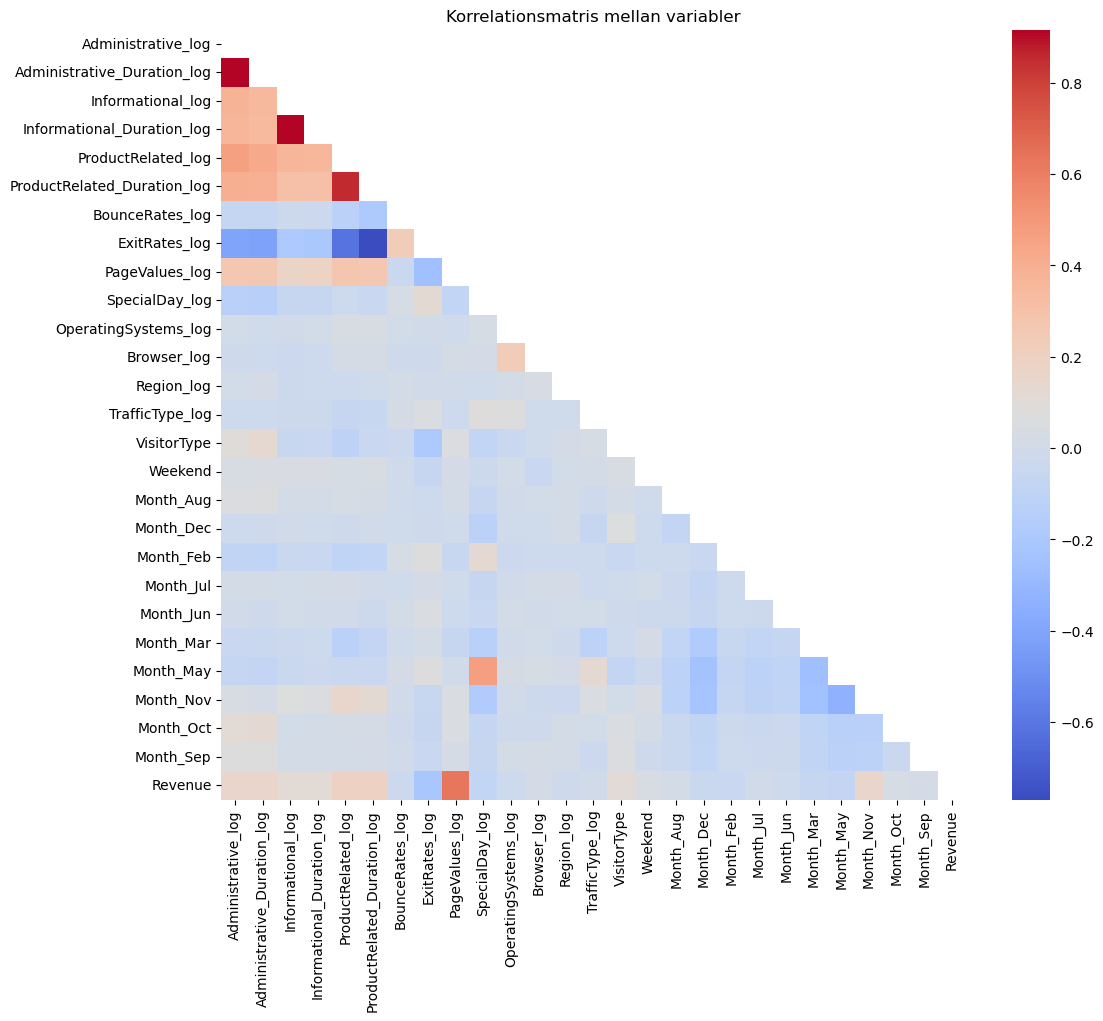

In [79]:
# Korrelationsmatris

corr_matrix = data.corr()

# Ta bort dubbla korrelationer och övre triangulär del
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Skapa en heatmap av korrelationsmatrisen
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Korrelationsmatris mellan variabler')
plt.show()

Korrelation visar en enkel linjär relation mellan två variabler. Vi ser att PageValues_log har ett högt positivt linjärt samband med Revenue, ExitRates_log har ett negativt samband. Alla månader verkar vara ha ett svagt negativt samband, mellan november har ett svagt positivt samband. 


Vi börjar från en logistik regression som använder linjära samband mellan variablerna, men sedan ska vi ta RandomForest och KNN, som använder mer komplexa relationer med Revenue. Vi ska analysera endast den modellen som blir mer effektiva (ska visa högst nivå av Accuracy). 

Först utför vi ett Train/test split, vilket ska vi använda vidare för alla tre våra modeller. Uppdelning är 80 % train data set. 20 % test tada set. 

In [80]:

X, y = data.drop(columns=['Revenue']).values, data['Revenue'].values

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size, 
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8891, 26)
(8891,)
(2223, 26)
(2223,)


In [81]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape)
print(y_test.shape)

(8891, 1)
(2223, 1)


In [82]:
# Check for NaNs and infinite values after cleaning
print("NaN values in X_train:", np.isnan(X_train).sum())
print("Infinite values in X_train:", np.isinf(X_train).sum())

NaN values in X_train: 0
Infinite values in X_train: 0


1. Logistisk regression. Använder denna typ av regression för att den beroende variabeln (Revenue) är en dikotom variabel, där False är 0 och True är 1.

In [83]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. Random forest

In [84]:
# Träna modellen 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Förutsäg testdata
Y_prediction = random_forest.predict(X_test)

# Beräkna noggrannhet för träningsdata
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(f'Training Accuracy: {acc_random_forest_train}%')



C:\Users\Natalia\AppData\Local\Temp\ipykernel_3136\2876841548.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Training Accuracy: 99.98%


3. Modell KNN

In [85]:

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)


c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [86]:

results = pd.DataFrame({'Model': ['KNN', 'Logestic Regresion', 'Random Forest'],\
                       'Score': [acc_knn, acc_logreg, acc_random_forest]})
result_df = results.sort_values(by= 'Score', ascending= False)
result_df = result_df.set_index('Score')
result_df.head()


,Model
Score,
100.00,Random Forest
93.21,KNN
89.58,Logestic Regresion


RandomForest-modellen har uppnått den högsta nivån av noggrannhet, 100 %, och därför väljer vi denna modell för att förutse resultatet. Att noggrannheten blev så hög beror på att modellen överanpassade sig till träningsdata, vilket kan ske när modellen är mycket kraftfull och fångar även små mönster som inte nödvändigtvis är relevanta för ny data. Men först undersöker vi hur Random Forest presterar när vi använder korsvalidering.

K-Fold korsvalidering:

K-Fold korsvalidering delar slumpmässigt upp träningsdata i K delmängder, kallade foldar. Koden nedan utför K-Fold korsvalidering på vår Random Forest-modell, där vi använder 10 foldar (K = 10). Detta resulterar i en array med 10 olika noggrannhetspoäng.


In [87]:

rf = RandomForestClassifier(n_estimators= 100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-pack

Scores: [0.91123596 0.8976378  0.89088864 0.90101237 0.89876265 0.91001125
 0.8976378  0.91338583 0.90438695 0.88976378]
Mean: 0.9014723019173166
Standard Deviation: 0.007776463297269057


Detta ser mycket mer realistiskt ut än tidigare. Vår modell har en genomsnittlig noggrannhet på 90 % med en standardavvikelse på 0,6 %. Standardavvikelsen visar hur precisa uppskattningarna är. I vårt fall innebär det att modellens noggrannhet kan variera med + - 0,6 %.


En annan stor fördel med Random Forest är att de gör det mycket enkelt att mäta den relativa betydelsen av varje variabel. Sklearn mäter en variabels betydelse genom att se på hur mycket trädenas noder, som använder den variabeln, i genomsnitt minskar orenhet (över alla träd i skogen). Detta värde beräknas automatiskt för varje variabel efter träningen och skalar resultatet så att summan av alla betydelser är lika med Vi kommer att visa detta nedan:

In [88]:
importances = pd.DataFrame({
    'feature': data.drop(columns=['Revenue']).columns,  
    'importance': np.round(random_forest.feature_importances_, 3)
})

importances = importances.sort_values('importance', ascending=False).set_index('feature')

importances.head(10)

,importance
feature,
PageValues_log,0.366
ProductRelated_Duration_log,0.089
ExitRates_log,0.085
ProductRelated_log,0.075
Administrative_Duration_log,0.057
BounceRates_log,0.056
Administrative_log,0.042
Region_log,0.032
TrafficType_log,0.032


<Axes: xlabel='feature'>

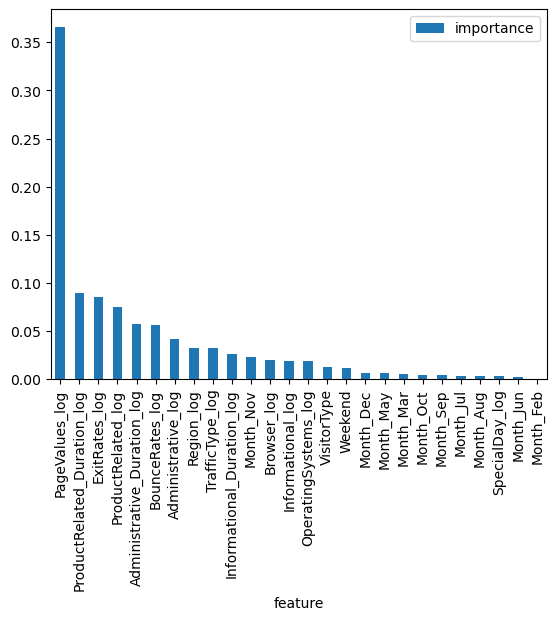

In [89]:

importances.plot.bar()

Endast 6 variabler som överstiger nivå 0.05 ska betraktas av oss som viktiga i modellen. Därför ska vi ta bort de som inte uppnår den nivå och räknar om modellen. 

In [90]:
# Steg 1: Extrahera de sex viktigaste funktionerna
top_features = importances.head(6).index.tolist()

# Steg 2: Filtrera tränings- och testdata för att endast inkludera de sex viktigaste funktionerna
X_train_top = X_train[:, [data.columns.get_loc(feature) for feature in top_features]]
X_test_top = X_test[:, [data.columns.get_loc(feature) for feature in top_features]]

# Bekräfta att datasetet nu endast innehåller de sex viktigaste funktionerna
print("Nya X_train form:", X_train_top.shape)
print("Nya X_test form:", X_test_top.shape)


Nya X_train form: (8891, 6)
Nya X_test form: (2223, 6)


Tränar vår RandomForest modell igen. 

In [91]:
# Träna modellen på de sex viktigaste funktionerna
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train_top, y_train)

# Prediktera på testdata
Y_prediction = random_forest.predict(X_test_top)

# Beräkna och visa träningens noggrannhet
acc_random_forest_train = round(random_forest.score(X_train_top, y_train) * 100, 2)
print(f'Training Accuracy: {acc_random_forest_train}%')

# Beräkna och visa testdata noggrannhet
acc_random_forest_test = round(random_forest.score(X_test_top, y_test) * 100, 2)
print(f'Test Accuracy: {acc_random_forest_test}%')


C:\Users\Natalia\AppData\Local\Temp\ipykernel_3136\2959394251.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_top, y_train)


Training Accuracy: 99.98%
Test Accuracy: 89.52%



Vår random forest-modell presterar lika bra som tidigare. En mer exakt metod för att utvärdera en random forest-klassificerare är att använda out-of-bag-prover för att uppskatta generaliseringsnoggrannheten. 

In [92]:

print("oob score:", round(random_forest.oob_score_, 4) * 100, '%')

oob score: 88.92999999999999 %


Att bara titta på noggrannheten räcker inte. Hyperparametrar hjälper till att göra modellen mer exakt, stabil och lämplig för den specifika uppgiften.

In [93]:

# Definiera hyperparameter-griden
param_dist = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 10, 18],
    "n_estimators": [100, 400, 700]
}

# Initialisera RandomForestClassifier
rf = RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=1, n_jobs=-1)

# RandomizedSearchCV för att hitta de bästa hyperparametrarna
clf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, n_jobs=-1, cv=3, scoring='accuracy', random_state=1)

# Träna modellen med de bästa hyperparametrarna
clf.fit(X_train_top, y_train)

# Visa de bästa hyperparametrarna och bästa score
best_params = clf.best_params_
best_score = clf.best_score_

print("Bästa hyperparametrar:", best_params)
print("Bästa score:", best_score)


c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Bästa hyperparametrar: {'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 5, 'criterion': 'entropy'}
Bästa score: 0.8957364247521804


Bästa hyperparametrar: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'criterion': 'gini'}
Bästa score: 0.896298803856045

Bästa hyperparameter är hittade, nu ska vi testa modellen med de parametrerna. 

In [94]:
# Definiera RandomForestClassifier med de bästa hyperparametrarna
random_forest = RandomForestClassifier(
    criterion='gini', 
    min_samples_leaf=10,  # Uppdaterad enligt bästa resultatet
    min_samples_split=10,  # Uppdaterad enligt bästa resultatet
    n_estimators=100,      # Uppdaterad enligt bästa resultatet
    max_features='sqrt',   # 'sqrt' är oftast en bra inställning för Random Forest
    oob_score=True,
    random_state=1, 
    n_jobs=-1
)

# Träna modellen med träningsdata
random_forest.fit(X_train_top, y_train)

# Gör förutsägelser på testdata
Y_prediction = random_forest.predict(X_test_top)

# Beräkna och skriv ut noggrannheten för träningsdata
train_accuracy = random_forest.score(X_train_top, y_train)  # Använd 'X_train_top' om det bara är de bästa funktionerna
print("Träningsnoggrannhet:", round(train_accuracy * 100, 2), "%")

# Skriv ut OOB-poängen
print("OOB score:", round(random_forest.oob_score_ * 100, 4), "%")


C:\Users\Natalia\AppData\Local\Temp\ipykernel_3136\3770713060.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_top, y_train)


Träningsnoggrannhet: 92.95 %
OOB score: 89.585 %


Resultatet visar att den nya modellen med de justerade hyperparametrarna har förbättrat prestanda. En hög träningsnoggrannhet kan ibland vara ett tecken på överanpassning, men i detta fall, med en OOB-poäng nära 90 %, verkar det som att modellen ändå generaliserar bra. 

In [95]:
predictions = cross_val_predict(random_forest, X_train_top, y_train, cv= 3)
confusion_matrix(y_train, predictions)

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([[7236,  284],
       [ 653,  718]], dtype=int64)

Nästa steg är Confusion Matrix

c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Natalia\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


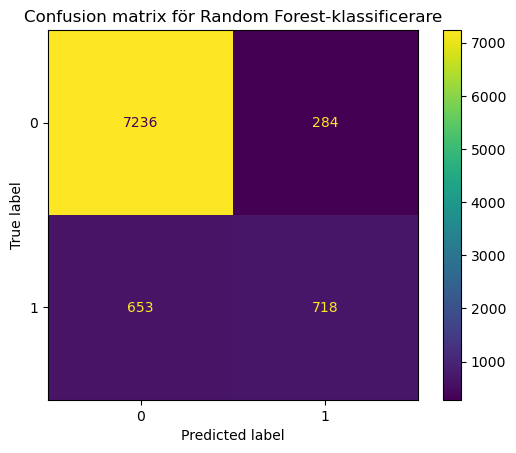

In [96]:

# Använd cross_val_predict för att få förutsägelser för träningsuppsättningen
predictions = cross_val_predict(random_forest, X_train_top, y_train, cv=3)

# Skapa en förvirringsmatris
cm = confusion_matrix(y_train, predictions)

# Visa förvirringsmatrisen
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()

# Visa diagrammet
plt.title("Confusion matrix för Random Forest-klassificerare")
plt.show()


In [97]:

# Beräkna precision, recall och F1-score
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

# Skriv ut resultaten
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Valfritt: Skriva ut en mer omfattande rapport
print("\nClassification Report:\n", classification_report(y_train, predictions))


Precision: 0.716566866267465
Recall: 0.5237053245805982
F1-Score: 0.605141171512853

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7520
           1       0.72      0.52      0.61      1371

    accuracy                           0.89      8891
   macro avg       0.82      0.74      0.77      8891
weighted avg       0.89      0.89      0.89      8891



Precision (0.73): Av alla förutsägelser för klass 1 (positiv klass) är 73% korrekta. Hög precision innebär färre falska positiva.

Recall (0.52): Endast 52% av de verkliga positiva fallen identifierades av modellen. Låg recall tyder på att modellen missar många positiva fall (falska negativa).
F1-Score (0.61): Detta värde visar en balans mellan precision och recall, men indikerar medelhög prestanda.

Klassificeringsrapport:

Klass 0 (Negativ klass):
        Precision: 0.92 – Mycket hög precision, 92% av förutsägelserna är korrekta.
        Recall: 0.96 – Mycket hög recall, 96% av verkliga klass 0 identifieras korrekt.
        F1-Score: 0.94 – Hög balans mellan precision och recall.

Klass 1 (Positiv klass):
        Precision: 0.73 – 73% av förutsägelserna för klass 1 är korrekta.
        Recall: 0.52 – Endast 52% av verkliga klass 1 identifieras, vilket visar på problem med att fånga positiva fall.
        F1-Score: 0.61 – Måttlig prestanda för klass 1.

        

Obalans i klasser: Modellen presterar bra för klass 0 men har svårt med klass 1. Det händer för att det finns en obalans i datamängden, vi har för få Revenue med klass 1 och de flesta Revenue med klass 0 

Nästa steg är ett plott Recall och Precision. 

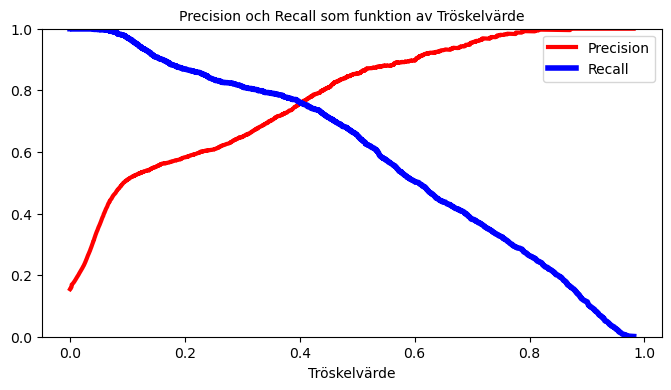

In [98]:

# Få sannolikheterna för våra förutsägelser
y_scores = random_forest.predict_proba(X_train_top)  # Använd X_train_top här
y_scores = y_scores[:, 1]  # Hämta sannolikheten för den positiva klassen

# Beräkna precision, recall och trösklar
precision, recall, threshold = precision_recall_curve(y_train, y_scores)  # Använd y_train här

# Funktion för att plotta precision och recall
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=3)  # Precision-kurva
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=4)  # Recall-kurva
    plt.xlabel("Tröskelvärde", fontsize=10)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0, 1])  # Begränsa y-axeln mellan 0 och 1

# Skapa figuren och plotta
plt.figure(figsize=(8, 4))
plot_precision_and_recall(precision, recall, threshold)
plt.title("Precision och Recall som funktion av Tröskelvärde", fontsize=10)
plt.show()


Ett tröskelvärde på 0.4 innebär att modellen är relativt konservativ, eftersom den endast klassificerar observationer som positiva om deras sannolikhet överstiger 40 %.
En precision och recall på 0.75 indikerar en balanserad prestanda, men det finns fortfarande utrymme för förbättringar. 

Det finns flera faktorer som ökar sannolikheten för att kunden gör ett köp:

PageValues_log: En högre PageValues_log indikerar ett större intresse eller värde på sidan, vilket ökar chansen att generera intäkter.

ExitRates_log: Lägsta ExitRates_log tyder på att besökarna stannar längre på sidan, vilket kan öka konverteringen och därmed sannolikheten för intäkter.

ProductRelated_Duration_log: Ju mer tid användare spenderar på produkter, desto mer sannolikt är det att de genomför ett köp.

ProductRelated_log: Att interagera med produktrelaterade sidor ökar sannolikheten för att konvertera besökare till köpare.

Administrative_Duration_log: En högre tid på administrativa sidor kan också indikera engagemang, vilket kan leda till ökad sannolikhet för intäkter.

BounceRates_log: Lägsta BounceRates_log innebär att användarna inte lämnar sidan omedelbart, vilket ger dem mer tid att överväga ett köp.

Sammanfattningsvis visar analysen att interaktioner och engagemang med sidan, inklusive tid spenderad och typ av produkter som besöks, har en avgörande roll för att öka chansen för ett köp. Det är viktigt att optimera dessa aspekter för att maximera konverteringarna.